# Exponential Fitting with leastsq - non linear fitting 

Most of the content of this notebook is from

Bruce Shapiro

Source code listings for Scientific Computation Python Hacking for Math Junkies

http://www.calculuscastle.com/pythonbook.html

Chapter 38

In [1]:
import numpy
import numpy as np

In [2]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
USPOP =[3929,5308,7239,9638,12866,17069,
        23191,31433,38558,50189,62979,76212,92228,
        106021,123202,132164,151325,179323,203302,226542,248709]
USYR  = np.linspace(1790,1990, 21)
print (USYR)

[1790. 1800. 1810. 1820. 1830. 1840. 1850. 1860. 1870. 1880. 1890. 1900.
 1910. 1920. 1930. 1940. 1950. 1960. 1970. 1980. 1990.]


In [4]:
xvals  = [X - 1790. for X in USYR]
logpop = np.log(USPOP)
m,b    = np.polyfit(xvals, logpop,1)
print (m, " - ", b)

xvals2 = USYR
logpop = np.log(USPOP)
m2,b2  = np.polyfit(xvals2, logpop,1)
print (m2, " - ", b2)

0.020768944996863194  -  8.671758205934369
0.020768944996863162  -  -28.50465333845069


### The wrong model

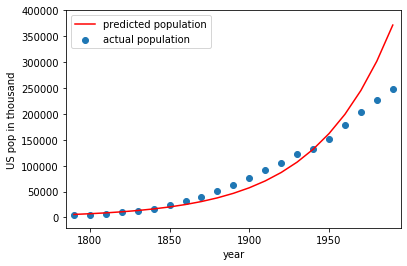

In [5]:
# Not so good model!!
def predicted(x, mm, bb):
    return np.exp(x*mm +bb)

plt.scatter(xvals, USPOP, label = "actual population")
pdata  =[predicted(x,m, b) for x in xvals]
plt.plot(xvals, pdata, c="red", label = "predicted population")
plt.xlabel("year")
plt.ylabel("US pop in thousand")
plt.xticks(range(10, 201, 50), range(1800,1991,50))
plt.xlim(-5, 205)
plt.ylim(-20000, 400000)
plt.legend(loc = "best")

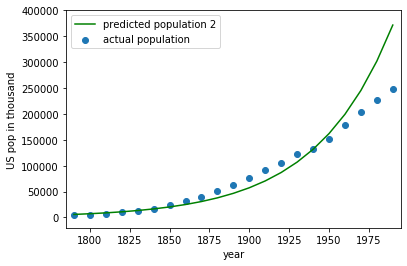

In [6]:
plt.scatter(USYR, USPOP, label = "actual population")
pdata2 =[predicted(x,m2, b2) for x in USYR]
plt.plot(USYR, pdata2, c="green", label = "predicted population 2")

plt.xlabel("year")
plt.ylabel("US pop in thousand")
plt.xlim(1785, 1995)
plt.ylim(-20000, 400000)
plt.legend(loc = "best")

In [8]:
def rmspop( m,b):
    def pred(x,m,b):
        return np.exp(m*x+b)
    preds = [pred(x,m,b) for x in xvals]
    rss = sum([(y1 - y2)**2 for y1, y2 in zip(preds, USPOP)])
    return np.sqrt(rss)

In [10]:
m3 = .015
b3 = 9.5
print (m)
print (b)
print (rmspop(m, b))
print (rmspop(m3, b3))

0.020768944996863194
8.671758205934369
158301.14409935309
44022.051609003756


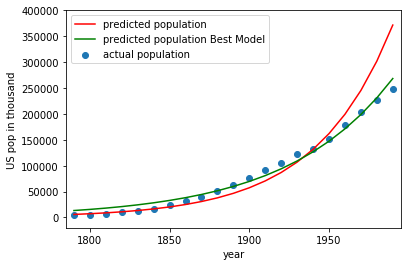

In [11]:
plt.scatter(xvals, USPOP, label = "actual population")
pdata  =[predicted(x,m, b)   for x in xvals]
pdata2 =[predicted(x,m3, b3) for x in xvals]
plt.plot(xvals, pdata,  c="red",   label = "predicted population")
plt.plot(xvals, pdata2, c="green", label = "predicted population Best Model")
plt.xlabel("year")
plt.ylabel("US pop in thousand")
plt.xticks(range(10, 201, 50), range(1800,1991,50))
plt.xlim(-5, 205)
plt.ylim(-20000, 400000)
plt.legend(loc = "best")

### Using leastsq from scipy.optmize

In [12]:
from scipy.optimize import leastsq

'''
This was used with Python 2
def func((m,b), times, pops):
    def f(t, m, b):
        return np.exp(t*m + b)
    preds = [f(t, m,b) for t in times]
    return [actual - pred  for actual, pred in zip(pops, preds)]
'''
def func(bb, times, pops):
    m     = bb[0]
    b     = bb[1]
    def f(t, m, b):
        return np.exp(t*m + b)
    preds = [f(t, m,b) for t in times]
    return [actual - pred  for actual, pred in zip(pops, preds)]

''' 
It was used in python 2
opt = leastsq(func, (m, b), args = (xvals, USPOP))
'''
m_b = [m,b]
opt = leastsq(func, m_b, args = (xvals, USPOP))
print (opt)
mopt, bopt = opt[0]
print (" m =", mopt, " b = ", bopt, "rms = ", rmspop(mopt, bopt))

def f(x, m, b):
    return np.exp(x*m +b)

def g(beta):
    m     = beta[0]
    b     = beta[1]
    preds = [f(t, m, b) for t in xvals]
    return [actual - pred  for actual, pred in zip(USPOP, preds)]

beta_start = (1, 1)
beta_opt, beta_cov = leastsq(g, beta_start)
print (beta_opt, beta_cov)
opt = leastsq(g, beta_start)
print (opt)
print (opt[0])

(array([0.01470848, 9.54763629]), 1)
 m = 0.01470848472434827  b =  9.54763629375544 rms =  43691.11689082178
[0.01470848 9.54763671] 1
(array([0.01470848, 9.54763671]), 1)
[0.01470848 9.54763671]


In [13]:
# This is the same as np.polyfit(x, ln(y),1) as this is a LINEAR model

'''
This was used with Python 2
def funcln((m,b), times, pops):
    def f(t, m, b):
        return t*m + b
    preds  = [f(t, m,b) for t in times]
    lnpops = np.log(pops)
    return [actual - pred  for actual, pred in zip(lnpops, preds)]
'''
def funcln(bb, times, pops):
    m     = bb[0]
    b     = bb[1]
    def f(t, m, b):
        return t*m + b
    preds  = [f(t, m,b) for t in times]
    lnpops = np.log(pops)
    return [actual - pred  for actual, pred in zip(lnpops, preds)]

m_b = [m,b]
''' 
It was used in python 2
optln = leastsq(funcln, (m, b), args = (xvals, USPOP))
'''
optln = leastsq(funcln, m_b, args = (xvals, USPOP))
print (optln)
moptln, boptln = optln[0]
print (" m =", moptln, " b = ", boptln, "rms = ", rmspop(moptln, boptln))

(array([0.02076894, 8.67175821]), 3)
 m = 0.020768944996863194  b =  8.671758205934369 rms =  158301.14409935309


44022.051609003756
43691.11689082178


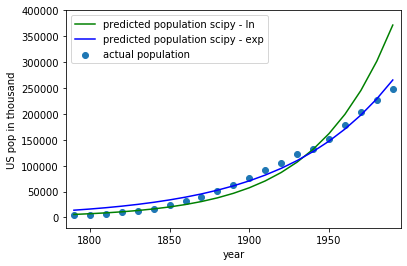

In [14]:
plt.scatter(xvals, USPOP, label = "actual population")

pdata2 =[predicted(x,moptln, boptln) for x in xvals]
pdata3 =[predicted(x,mopt  , bopt)   for x in xvals]

plt.plot(xvals, pdata2, c="green", label = "predicted population scipy - ln")
plt.plot(xvals, pdata3, c="blue",  label = "predicted population scipy - exp")
plt.xlabel("year")
plt.ylabel("US pop in thousand")
plt.xticks(range(10, 201, 50), range(1800,1991,50))
plt.xlim(-5, 205)
plt.ylim(-20000, 400000)
plt.legend(loc = "best")

print (rmspop(m3, b3))
print (rmspop(mopt, bopt))